#MGT-483 Optimal Decision Making 2024: Group Project
In traditional linear programming (LP), the goal is to find an optimal solution of a given optimization model with known input parameters. Inverse optimization (IO), on the other hand, seeks an optimization model that explains a given optimal decision, thereby reversing the conventional optimization process. IO has applications in various fields such as economics, engineering, and operations research and thus plays an important role in decision-making processes. For example, if past decisions of an economic agent are observable, IO allows us to learn this agent's decision model. This model may then allow us to predict future decisions of the agent, which could impact our own decision problem. Therefore, understanding and advancing IO techniques may help us to improve decision-making processes across diverse application domains.

This project is based on the paper [1], [which is available from here](https://arxiv.org/pdf/1511.04650.pdf) or from the [Management Science Webpage](https://pubsonline.informs.org/doi/abs/10.1287/mnsc.2017.2992).

As a concrete example, consider the following situation. You are the manager of a manufacturing company entering a new market. The company aims to manufacture various products using a numer of raw materials. Your job is to negotiate the prices of these raw materials with the supplier. For this negotiation it would be helpful to know the prices that the supplier has offered to your competitor. Needless to say that your competitor has no interest in helping you by revealing this information. However, you may be able to estimate the prices offered to your competitor by using inverse optimization. To this end, assume that you know the production process used by your competitor. Assume also that you know the maximum amounts of the raw materials that can be ordered from the supplier over one planning cycle. This information allows you to construct the feasible set of the competitor's optimization problem (which is a manufacturing problem, that is, a linear program). Unfortunately, you do not know the competitor's objective function because it depends on the unknown prices for the raw materials. Fortunately, however, public companies are legally required to publish sales data, that is, you can observe your competitor's optimal production decisions. As we will see in this project, observing the optimal solution of a linear program with an unknown objective function allows us to construct an estimator for the objective function coefficients. Using this estimator, you can then (approximately) reconstruct the prices your competitor had to pay to the supplier for the raw materials. Now you are well prepared to enter negotiations with the supplier!

Now let's start from the basics about how to find the objective function coefficients using inverse optimization.

## 1 Inverse Linear Programming: Formulation [20 points]
Assume as ususal that $\mathbf{x} \in \mathbb{R}^n$, $\mathbf{c} \in \mathbb{R}^n$, $\mathbf{A} \in \mathbb{R}^{m \times n}$ and $\mathbf{b} \in \mathbb{R}^m$.  We define the *linear programming* problem as:
$$
\begin{alignedat}{2}
\mathbf{LP}(\mathbf{c}): & \quad \underset{\mathbf{x}}{\text{minimize}} && \quad \mathbf{c}^\top\mathbf{x} \\
& \quad \text{subject to} && \quad \mathbf{A}\mathbf{x} \ge \mathbf{b}.
\end{alignedat}
$$
In the following we assume that $\mathbf{A}$ and $\mathbf{b}$ are known. However, we are not given the cost vector $\mathbf{c}$. Instead, we have access to a decision $\mathbf{x}^0 \in \mathbb{R}^n$, which is known to be an optimal or a near-optimal solution of $\mathbf{LP}(\mathbf{c})$. Inverse optimization aims to determine a vector $\mathbf c$ that explains the observed decision $\mathbf x^0$. More precisely, given $\mathbf{A}$, $\mathbf{b}$ and $\mathbf{x}^0$, inverse optimzation seeks a $\mathbf c$ that makes $\mathbf{x}^0$ optimal in $\mathbf{LP}(\mathbf{c})$. Note that if $\mathbf c=\mathbf 0$, then every feasible solution of $\mathbf{LP}(\mathbf{c})$ is optimal. Thus, it makes sense to search for a normalized cost vector that satisfies $\|\mathbf{c}\|_1 = 1$. This specification gives rise to the following *inverse optimization* problem.
<!-- In the data-driven regime, it is possible that the observed decision $\mathbf x^0$ is not an exact optimal solution but an approximate one due to data noise. Thus we denote by $\mathbf x^0$ as the observed solution. We consider $\mathbf{A}$, $\mathbf{b}$ and $\mathbf{x}^0$ to be given; thus, they form the *data* that we use to infer the cost vector $\mathbf{c}$. We start with what we refer to as the classical *inverse* optimization problem, which finds a cost vector $\mathbf{c}$ such that $\mathbf{x}^0$ is optimal for $\mathbf{IP}(\mathbf{c})$: -->
$$
\begin{alignedat}{2}
\mathbf{IO}(\mathbf{x}^0): & \quad \underset{\mathbf{y},\mathbf{c}}{\text{minimize}} && \quad 0 \\
& \quad \text{subject to} && \quad \mathbf{A}^\top\mathbf{y} = \mathbf{c} \\
& && \quad \mathbf{c}^\top\mathbf{x}^0 = \mathbf{b}^\top\mathbf{y} \\
& && \quad \|\mathbf{c}\|_1 = 1 \\
& && \quad \mathbf{y} \ge \mathbf{0}
\end{alignedat}
$$

### 1.1 Interpretation of $\mathbf{IO}(\mathbf{x}^0)$ [10 points]
Show that if $(\mathbf y^*, \mathbf c^*)$ is an optimal solution of $\mathbf{IO}(\mathbf{x}^0)$ and if $\mathbf x^0$ is feasible (that is, $\mathbf{A}\mathbf{x}^0 \ge \mathbf{b}$), then $\mathbf x^0$ is an optimal solution of $\mathbf{LP}(\mathbf{c}^*)$. *Hint:* Use the weak duality theorem.
<!-- Can you explain why one would formuate the inverse problem as $\mathbf{IO}(\mathbf{x^0})$ (including the objective, limitations, and decision variables). Show that $\mathbf{c}$ obtained by solving $\mathbf{IO}(\mathbf{x^0})$  is optimal for $\mathbf{IP}(\mathbf{c})$? -->

<font color="green">Your answer:</font>
Our primal problem is:
$$
\begin{alignedat}{2}
\mathbf{LP}(\mathbf{c^*}): & \quad \underset{\mathbf{x}}{\text{minimize}} && \quad \mathbf{c^*}^\top\mathbf{x} \\
& \quad \text{subject to} && \quad \mathbf{A}\mathbf{x} \ge \mathbf{b}.
\end{alignedat}
$$
And the corresponding dual problem is:
$$
\begin{alignedat}{2}
& \quad \underset{\mathbf{p}}{\text{maximize}} && \quad \mathbf{b}^\top\mathbf{p} \\
& \quad \text{subject to} && \quad \mathbf{A}^⊤\mathbf{p} = \mathbf{c^*} \\
& \quad && \quad \mathbf{p} \ge \mathbf{0}
\end{alignedat}
$$

Given that $(\mathbf y^*, \mathbf c^*)$ is an optimal solution of $\mathbf{IO}(\mathbf{x}^0)$ we have that

$$
\begin{alignedat}{1}
& \mathbf{A}^\top\mathbf{y^*} = \mathbf{c^*} \\
& \mathbf{c^*}^\top\mathbf{x}^0 = \mathbf{b}^\top\mathbf{y^*} \\
& \|\mathbf{c^*}\|_1 = 1 \\
& \mathbf{y^*} \ge \mathbf{0}
\end{alignedat}
$$

We have that $\mathbf{x^0}$ is primal feasible, $\mathbf{y^*}$ is dual feasible (as $\mathbf{y^* \ge 0}$ and $\mathbf{A^T y^* = c^*}$) and $\mathbf{b^T y^* = c^*}^\top \mathbf{x^0}$ (due to $\mathbf{y^*}$, $\mathbf{c^*}$ being optimal in $IO(\mathbf{x^0}$)). Thus by the weak duality corollary, $\mathbf x^0$ is optimal in the primal ($LP(c^*)$) and $\mathbf{p = y^*}$ is optimal in the dual.


### 1.2 Infeasibility of $\mathbf{IO}(\mathbf{x}^0)$ [10 points]
Explain why $\mathbf{IO}(\mathbf{x}^0)$ fails to be a linear program. Show that if we know in advance that $\mathbf c \geq \mathbf 0$, however, then $\mathbf{IO}(\mathbf{x}^0)$ simplifies to a linear program. Solve $\mathbf{IO}(\mathbf{x}^0)$ using CVXPY for the $\mathbf A$, $\mathbf b$ and $\mathbf x^0$ given below. Report the result. Is $\mathbf{IO}(\mathbf{x}^0)$ feasible? If not, why not?

In [313]:
# Import packages.
import cvxpy as cp
import numpy as np

# Data
A = np.array([[2, 5],
              [2, -3],
              [2, 1],
              [-2, -1]])
b = np.array([10, -6, 4, -10])
x0 = np.array([2.5, 3])

In [314]:
# Define variables, objective, and constraints
c = cp.Variable((2,1))
y = cp.Variable((4,1))
objective = 0
constraints = [0 <= y, A.T@y == c, c.T@x0==b.T@y, c[0,0]>= 0, c[1,0]>=0, c[0,0] + c[1,0] == 1]
# Solve the problem
prob = cp.Problem(cp.Minimize(objective),constraints)
prob.solve()
# Print the result if you want
print("\nThe optimal value is", prob.value)
print("A solution c is", c.value)
print("A solution y is", y.value)


The optimal value is inf
A solution c is None
A solution y is None


<font color="green">Your answer:</font>
$\mathbf{IO}(\mathbf{x}^0)$ fails to be a linear program as the constraint on the vector $\mathbf{c}$: $\|\mathbf{c}\|_1 = 1$  is not linear as it contains an absolute value. If we know that $\mathbf{c}\ge0$ then the constraint becomes linear $\mathbf{1}^⊤ \mathbf{c} = 1$. The problem is NOT feasible as the optimal cost is infinity.

## 2 Generalized Inverse Linear Optimization [15 points]
We have seen that even if $\mathbf x^0$ is a feasible solution for the linear programming problem, it is possible that the inverse optimization problem $\mathbf{IO}(\mathbf{x}^0)$ is infeasible. This can happen when $\mathbf x^0$ is not an exact optimizer of the linear programming problem but a noisy observation of an exact optimizer. We thus introduce the following generalized formulation of the inverse optimization problem.
$$
\begin{alignedat}{2}
\textbf{GIO}(\mathbf{x}^0): & \quad \underset{\mathbf{y},\mathbf{c},\boldsymbol{\epsilon}}{\text{minimize}} && \quad {\|\boldsymbol{\epsilon}\|_p} \\
&\quad\text{subject to}  && \quad \mathbf{A}^\top\mathbf{y} = \mathbf{c}\\
& && \quad \mathbf{c}^\top(\mathbf{x}^0 - \boldsymbol{\epsilon}) = \mathbf{b}^\top\mathbf{y}\\
& && \quad \|\mathbf{c}\|_1 = 1 \\
& && \quad \mathbf{y} \ge \mathbf{0}
\end{alignedat}
$$
Here, the new auxiliary decision vector $\boldsymbol \epsilon$ captures the observation noise. The problem aims to find a cost vector $\mathbf c$ for which the de-noised decision $\mathbf x^0-\boldsymbol \epsilon$ is optimal in $\mathbf{LP}(\mathbf c)$, while keeping the noise as small as possible with
respect to the $p$-norm for some $p\geq 1$. This alternative model is guaranteed to be feasible. However, this problem still involves two non-linear constraints: $\mathbf{c}^\top(\mathbf{x}^0 - \boldsymbol{\epsilon}) = \mathbf{b}^\top\mathbf{y}$ and $\|\mathbf{c}\|_1 = 1$. It remains unclear how to solve the problem directly.

### 2.1 Closed-form Solution
Luckily, problem $\mathbf{GIO}(\mathbf x^0)$ admits a closed-form solution. In Reference [1], you will find the following theorem.


#### Theorem 1.
Given $\mathbf{x}^0$ such that $\mathbf{A}\mathbf{x}^0\geq \mathbf b$, where $\mathbf{A}$ is a full-rank matrix, an optimal solution to $\mathbf{GIO}(\mathbf{x}^0)$ is given by
$$
\begin{equation}
(\mathbf y^*,\mathbf c^*,\boldsymbol \epsilon^*) = \left(\frac{\mathbf{e}_{i^*}}{\|\mathbf{a}_{i^*}\|_1},\frac{\mathbf{a}_{i^*}}{\|\mathbf{a}_{i^*}\|_1},\frac{\mathbf{a}_{i^*}^\top \mathbf{x}^0-b_{i^*}}{\|\mathbf{a}_{i^*}\|_q}\mathbf{v}^*\right)
\end{equation},
$$
where $\mathbf{a}_i$ defines the $i$-th row of $\mathbf{A}$, $\mathbf{e}_i$ is the $i$-th standard basis vector whose entries are all 0 except for the $i$-th component, which equals 1. In addition, $q$ satisfies $1/p+1/q=1$, where $p$ defines the error norm in $\mathbf{GIO}(\mathbf{x}^0)$, while
$$i^*\in \underset{i\in 1,...,m}{\text{argmin}}\{(\mathbf{a}^\top_i\mathbf{x}^0-b_i)/\|\mathbf{a}_i\|_q\}  \quad \text{and}\quad \mathbf{v}^*\in \underset{\|\mathbf{v}\|_p=1}{\text{argmin}}\ \mathbf{a}^\top_{i^*}\mathbf{v}.$$
Furthermore, the optimal objective value of $\mathbf{GIO}(\mathbf{x}^0)$ is $\ \|\boldsymbol{\epsilon}^*\|_p=(\mathbf{a}^\top_{i^*}\mathbf{x}^0-b_{i^*})/\|\mathbf{a}_{i^*}\|_q.$

### 2.2 Interpretation of $\mathbf{GIO}(\mathbf{x}^0)$ [15 points]

Assume that $p=1$. Solve $\mathbf{GIO}(\mathbf{x}^0)$ using Theorem 1 for the same data $\mathbf{A}$, $\mathbf{b}$ and $\mathbf x^0$ that you used in Section 1.2. Denote the resulting optimal cost vector by $\hat{\mathbf{c}}$.

Next, solve $\mathbf{LP}(\hat{\mathbf{c}})$ with CVXPY. Compare the resulting optimizer with $\mathbf x^0$, and compare the resulting optimal value with $\hat{\mathbf c}^\top \mathbf x^0$. Solve the same question again under the assumption that $p=\infty$.

# Case where **$p=1$**

In [315]:
# solve GIO(x0)
i_star = np.argmin((A@x0 - b)/np.linalg.norm(A, ord=np.inf, axis=1))
c_hat = A[i_star]/np.linalg.norm(A[i_star], ord=1)

In [316]:
c_hat

array([ 0.4, -0.6])

In [317]:
# solve LP(c_hat)
# Define variables, objective, and constraints
x_0_optimizer = cp.Variable((2,))
objective = c_hat @ x_0_optimizer
constraints = [A@x_0_optimizer >= b]
# Solve the problem
prob = cp.Problem(cp.Minimize(objective),constraints)
prob.solve()

-1.1999999999629254

In [318]:
# compare/print
print("A solution x_0_optimizer is", x_0_optimizer.value)
print("Our original x0 is", x0)
print("\nThe optimal value is", prob.value)
print("The value of c_hat @ x0 is",  c_hat @ x0)

A solution x_0_optimizer is [1.14138722 2.76092481]
Our original x0 is [2.5 3. ]

The optimal value is -1.1999999999629254
The value of c_hat @ x0 is -0.7999999999999998


<font color="green">Answer:</font>
We see that the optimizer is quite different from x0 (it's smaller).
We also see that the resulting optimal value is different from $\hat{\mathbf c}^\top \mathbf x^0$ (it is smaller).


# Case where **$p=∞$**

In [319]:
# solve GIO(x0)
i_star = np.argmin((A@x0 - b)/np.linalg.norm(A, ord=1, axis=1))
c_hat = A[i_star]/np.linalg.norm(A[i_star], ord=1)

In [320]:
c_hat

array([ 0.4, -0.6])

In [321]:
# solve LP(c_hat)
# Define variables, objective, and constraints
x_0_optimizer = cp.Variable((2,))
objective = c_hat @ x_0_optimizer
constraints = [A@x_0_optimizer >= b]
# Solve the problem
prob = cp.Problem(cp.Minimize(objective),constraints)
prob.solve()

-1.1999999999629254

In [322]:
# compare/print
print("A solution x_0_optimizer is", x_0_optimizer.value)
print("Our original x0 is", x0)
print("\nThe optimal value is", prob.value)
print("The value of c_hat @ x0 is",  c_hat @ x0)

A solution x_0_optimizer is [1.14138722 2.76092481]
Our original x0 is [2.5 3. ]

The optimal value is -1.1999999999629254
The value of c_hat @ x0 is -0.7999999999999998


<font color="green">Answer:</font>
The values obtained when $p = \infty$ are the same as the ones obtained with $p = 1$. We thus have the same comparison. (We see that the optimizer is quite different from x0 (it's smaller)
We also see that the resulting optimal value is different from $\hat{\mathbf c}^\top \mathbf x^0$ (it is smaller).
)

## 3 Absolute and Relative Duality Gaps [35 points]
Problem $\textbf{GIO}_a(\mathbf{x}^0)$ guarantees feasibility by adding a perturbation to $\mathbf x^0$. However, the resulting problem is not a linear program. One can also formulate an alternative generalized inverse optimization model that allows for a non-vanishing duality gap as shown below.
$$
\begin{alignedat}{2}
\textbf{GIO}_a(\mathbf{x}^0): & \quad \underset{\mathbf{y},\mathbf{c},\epsilon_a}{\text{minimize}} && \quad \epsilon_a \\
 & \quad\text{subject to} && \quad \mathbf{A}^\top\mathbf{y} = \mathbf{c} \\
& && \quad \mathbf{c}^\top\mathbf{x}^0 = \mathbf{b}^\top\mathbf{y}+\epsilon_a \\
& && \quad \|\mathbf{c}\|_1 = 1 \\
& && \quad \mathbf{y} \ge \mathbf{0}
\end{alignedat}
$$
Here, the new auxiliary variable $\epsilon_a$ captures indeed the absolute duality gap, which we aim to minimize. Note that problem $\textbf{GIO}_a(\mathbf{x}^0)$ is again guaranteed to be feasible and reduces to a linear program when we add the constraint $\mathbf c\geq \mathbf 0$.

### 3.1 Interpretation of $\mathbf{GIO}_a(\mathbf{x}^0)$ [20 points]

Solve problem $\mathbf{GIO}_a(\mathbf{x}^0)$ using CVXPY for the same data $\mathbf{A}$, $\mathbf{b}$ and $\mathbf x^0$ as in Section 1.2, and assume that $\mathbf{c}\geq \mathbf 0$. Denote the optimal cost vector by $\hat{\mathbf{c}}$. Solve $\mathbf{LP}(\hat{\mathbf{c}})$ and compare the resulting optimal solution with $\mathbf x^0$, and compare its optimal value with $\hat{\mathbf c}^\top \mathbf x^0$.

In [323]:
# solve GIO_a(x0)
c_hat = cp.Variable((2,))
y = cp.Variable((4,))
epsilon_a = cp.Variable((1,))
objective = epsilon_a
constraints = [A.T@y == c_hat, c_hat@x0 == b@y + epsilon_a, c_hat>=0, c_hat[0]+c_hat[1]==1, y>=0]
# Solve the problem
prob = cp.Problem(cp.Minimize(objective),constraints)
prob.solve()

1.3333333332995656

In [324]:
c_hat.value

array([0.66666667, 0.33333333])

In [325]:
# solve LP(c_hat)
# Define variables, objective, and constraints
x_0_optimizer = cp.Variable((2,))
objective = c_hat.value @ x_0_optimizer
constraints = [A@x_0_optimizer >= b]
# Solve the problem
prob = cp.Problem(cp.Minimize(objective),constraints)
prob.solve()

1.3333333333892297

In [326]:
# compare/print
print("A solution x_0_optimizer is", x_0_optimizer.value)
print("Our original x0 is", x0)
print("\nThe optimal value is", prob.value)
print("The value of c_hat @ x0 is",  c_hat.value @ x0)

A solution x_0_optimizer is [0.91261886 2.17476228]
Our original x0 is [2.5 3. ]

The optimal value is 1.3333333333892297
The value of c_hat @ x0 is 2.666666666674816


<font color="green">Answer:</font>
We see that the optimizer is quite different from x0 (it's smaller)
We also see that the resulting optimal value is different from $\hat{\mathbf c}^\top \mathbf x^0$ (it is smaller: it's ~half of it).

Solve problem $\mathbf{GIO}_a(\mathbf{x}^0)$ again using CVXPY for the same data $\mathbf{A}$, $\mathbf{b}$ and $\mathbf x^0$ as in Section 1.2. This time, however, do not assume that $\mathbf{c}\geq \mathbf 0$. In this case, $\mathbf{GIO}_a(\mathbf{x}^0)$ is not a linear program. Show that $\mathbf{GIO}_a(\mathbf{x}^0)$ can be solved by solving four different linear programs, one for each facet of the 1-norm unit ball, such that the optimal value of $\mathbf{GIO}_a(\mathbf{x}^0)$ coincides with the smallest of the optimal values of the four linear programs. The four linear programs can be obtained by restricting the signs of all coordinates of the 2-dimensional vector $\mathbf{c}$.

Denote the optimal cost vector by $\hat{\mathbf{c}}$. Solve $\mathbf{LP}(\hat{\mathbf{c}})$. Compare the resulting optimal solution with $\mathbf x^0$, and compare its optimal value with $\hat{\mathbf c}^\top \mathbf x^0$.

<font color="green">Answer:</font>
$\mathbf{GIO}_a(\mathbf{x}^0)$ can be solved by solving four different linear programs, one for each facet of the 1-norm unit ball. The four linear programs can be obtained by restricting the signs of all coordinates of the 2-dimensional vector $\mathbf{c}$. The optimal value of $\mathbf{GIO}_a(\mathbf{x}^0)$ is then the smallest of the optimal values of the four linear programs.

In [327]:
# solve GIO_a(X0)

### c1>=0 and c2>=0
c_hat1 = cp.Variable((2,))
y1 = cp.Variable((4,))
epsilon_a1 = cp.Variable((1,))
objective1 = epsilon_a1
constraints1 = [A.T@y1 == c_hat1, c_hat1@x0 == b@y1 + epsilon_a1, c_hat1>=0, c_hat1[0]+c_hat1[1]==1, y1>=0]
# Solve the problem
prob1 = cp.Problem(cp.Minimize(objective1),constraints1)
res1 = prob1.solve()


# solve GIO_a(x0)
### c1>=0 and c2<=0
c_hat2 = cp.Variable((2,))
y2 = cp.Variable((4,))
epsilon_a2 = cp.Variable((1,))
objective2 = epsilon_a2
constraints2 = [A.T@y2 == c_hat2, c_hat2@x0 == b@y2 + epsilon_a2, c_hat2[0]>=0, c_hat2[1]<=0, c_hat2[0]-c_hat2[1]==1, y2>=0]
# Solve the problem
prob2 = cp.Problem(cp.Minimize(objective2),constraints2)
res2 = prob2.solve()


# solve GIO_a(x0)
### c1<=0 and c2<=0
c_hat3 = cp.Variable((2,))
y3 = cp.Variable((4,))
epsilon_a3 = cp.Variable((1,))
objective3 = epsilon_a3
constraints3 = [A.T@y3 == c_hat3, c_hat3@x0 == b@y3 + epsilon_a3, c_hat3<=0, -c_hat3[0]-c_hat3[1]==1, y3>=0]
# Solve the problem
prob3 = cp.Problem(cp.Minimize(objective3),constraints3)
res3 = prob3.solve()


# solve GIO_a(x0)
### c1<=0 and c2>=0
c_hat4 = cp.Variable((2,))
y4 = cp.Variable((4,))
epsilon_a4 = cp.Variable((1,))
objective4 = epsilon_a4
constraints4 = [A.T@y4 == c_hat4, c_hat4@x0 == b@y4 + epsilon_a4, c_hat4[0]<=0, c_hat4[1]>=0, -c_hat4[0]+c_hat4[1]==1, y4>=0]
# Solve the problem
prob4 = cp.Problem(cp.Minimize(objective4),constraints4)
res4 = prob4.solve()

print(res1, res2, res3, res4)

c_hat_idx = np.argmin(np.array([res1, res2, res3, res4]))
c_hat = [c_hat1, c_hat2, c_hat3, c_hat4][c_hat_idx]

1.3333333332995656 0.399999999950368 0.666666663020826 2.499999998990792


In [328]:
c_hat.value

array([ 0.4, -0.6])

In [329]:
# solve LP(c)
# Define variables, objective, and constraints
x_0_optimizer = cp.Variable((2,))
objective = c_hat.value @ x_0_optimizer
constraints = [A@x_0_optimizer >= b]
# Solve the problem
prob = cp.Problem(cp.Minimize(objective),constraints)
prob.solve()

-1.2000000000098574

In [330]:
# compare/print
print("A solution x_0_optimizer is", x_0_optimizer.value)
print("Our original x0 is", x0)
print("\nThe optimal value is", prob.value)
print("The value of c_hat @ x0 is",  c_hat.value @ x0)

A solution x_0_optimizer is [1.14170561 2.76113707]
Our original x0 is [2.5 3. ]

The optimal value is -1.2000000000098574
The value of c_hat @ x0 is -0.8000000000669105


<font color="green">Answer:</font>
We see that the optimizer is quite different from x0 (it's smaller)
We also see that the resulting optimal value is different from $\hat{\mathbf c}^\top \mathbf x^0$ (it is 1.5 times smaller)

### 3.2 Relative Duality Gap [15 points]

Instead of minimizing the absolute duality gap, we can also formulate in inverse optimization problem that minimizes the relative duality gap as shown below.
$$
\begin{alignedat}{2}
\textbf{GIO}_r(\mathbf{x}^0): & \quad \underset{\mathbf{y},\mathbf{c},\epsilon_r}{\text{minimize}} && \quad |\epsilon_r - 1| \\
&\quad \text{subject to}  && \quad \mathbf{A}^\top\mathbf{y} = \mathbf{c} \\
& && \quad \mathbf{c}^\top\mathbf{x}^0 = \epsilon_r\mathbf{b}^\top\mathbf{y} \\
& && \quad \|\mathbf{c}\|_1 = 1 \\
& && \quad \mathbf{y} \ge \mathbf{0}
\end{alignedat}
$$

### Reformulation of $\textbf{GIO}_r(\mathbf{x}^0)$
Explain why problem $\mathbf{GIO}_r(\mathbf{x}^0)$ fails to be a linear program even if we include the constraint $\mathbf c\geq \mathbf 0$. Show that the optimal solution of problem $\mathbf{GIO}_r(\mathbf{x}^0)$ can be obtained from the optimal solution of the following problem by rescaling.
$$
\begin{alignedat}{2}
\textbf{GIO}_{r}'(\mathbf{x}^0): & \quad \underset{\mathbf{y},\mathbf{c},\epsilon_r}{\text{minimize}} && \quad |\epsilon_r - 1| \\
&\quad \text{subject to}  && \quad \mathbf{A}^\top\mathbf{y} = \mathbf{c} \\
& && \quad \mathbf{c}^\top\mathbf{x}^0 = \epsilon_r\mathbf{b}^\top\mathbf{y} \\
& && \quad |\mathbf{b}^\top\mathbf{y}| = 1 \\
& && \quad \mathbf{y} \ge \mathbf{0}
\end{alignedat}
$$
Show that $\textbf{GIO}_{r}'(\mathbf{x}^0)$ can be sovled by solving two separate linear programs corresponding to $\mathbf{b}^\top \mathbf{y}=+1$ and $\mathbf{b}^\top \mathbf{y}=-1$.

<font color="green">Your answer:</font> \\

1) Problem $\mathbf{GIO}_r(\mathbf{x}^0)$ fails to be a linear program even if we include the constraint $\mathbf c\geq \mathbf 0$ as there exists 2 other nonlinear constraints: the 2nd constraint where we are multiplying 2 variables with each other; namely $y$ and $ϵ_r$ and the 3rd constraint where we are taking the absolute value: $|b^Ty|$ which is not linear. The objective also contains an absolute value, therefore the objective is not linear neither.

2) The optimal solution of problem $\mathbf{GIO}_r(\mathbf{x}^0)$ can be obtained from the optimal solution of $\mathbf{GIO'}_r(\mathbf{x}^0)$ by rescaling. We can obtain the optimal $\hat{c}$ from  $\mathbf{GIO'}_r(\mathbf{x}^0)$ and rescale it by dividing it by its 1-norm. This will make it feasible in problem $\mathbf{GIO}_r(\mathbf{x}^0)$. And as the optimal solution doesn't depend of the norm of the gradient, this solution will be optimal.    

3) $\textbf{GIO}_{r}'(\mathbf{x}^0)$ can be sovled by solving two separate linear programs corresponding to $\mathbf{b}^\top \mathbf{y}=+1$ and $\mathbf{b}^\top \mathbf{y}=-1$ as this would make the 3rd constraint linear in both auxiliary problems as well as the 2nd constraint which becomes: $\mathbf{c}^\top\mathbf{x}^0 = \epsilon_r$ and $\mathbf{c}^\top\mathbf{x}^0 = -\epsilon_r$ respectively. We then just need to take the solution corresponding to the minimum of the 2 problems.

Solve problem $\mathbf{GIO}_r(\mathbf{x}^0)$ using CVXPY for the same data $\mathbf{A}$, $\mathbf{b}$ and $\mathbf x^0$ as in Section 1.2. Denote the optimal cost vector by $\hat{\mathbf{c}}$. Solve $\mathbf{LP}(\hat{\mathbf{c}})$. Compare the resulting optimal solution with $\mathbf x^0$, and compare its optimal value with $\hat{\mathbf c}^\top \mathbf x^0$.  Note that you do not need to assume that $\mathbf{c}\geq \mathbf 0$. Is $\frac{\mathbf{x}^0}{\epsilon_r}$ feasible or optimal in $\mathbf{LP(\hat{c})}$? Please explain why it is feasible or optimal.

In [331]:
# solve GIO_r
epsilon_r1 = cp.Variable((1,))
y1 = cp.Variable((4, ))
c_hat1 = cp.Variable((2, ))
objective1 = cp.abs(epsilon_r1 - 1)
constraints1 = [A.T@y1==c_hat1, c_hat1@x0 == epsilon_r1, b@y1==1, y1>=0]
# Solve the problem
prob1 = cp.Problem(cp.Minimize(objective1),constraints1)
res1 = prob1.solve()

epsilon_r2 = cp.Variable((1,))
y2 = cp.Variable((4, ))
c_hat2 = cp.Variable((2, ))
objective2 = cp.abs(epsilon_r2 - 1)
constraints2 = [A.T@y2==c_hat2, c_hat2@x0 == -epsilon_r2, b@y2==-1, y2>=0]
# Solve the problem
prob2 = cp.Problem(cp.Minimize(objective2),constraints2)
res2 = prob2.solve()

print(res1, res2)

c_hat_idx = np.argmin(np.array([res1, res2]))
c_hat = [c_hat1, c_hat2][c_hat_idx]
rescaled_c_hat = c_hat.value/np.linalg.norm(c_hat.value, ord=1)

0.9999999996796198 0.19999999987560535


In [332]:
c_hat.value

array([-0.2, -0.1])

In [333]:
rescaled_c_hat

array([-0.66666666, -0.33333334])

In [334]:
# solve LP(c_hat)
# Define variables, objective, and constraints
x_0_optimizer = cp.Variable((2,))
objective = rescaled_c_hat @ x_0_optimizer
constraints = [A@x_0_optimizer >= b]
# Solve the problem
prob = cp.Problem(cp.Minimize(objective),constraints)
prob.solve()

-3.333333331707487

In [335]:
# compare/print
print("A solution x_0_optimizer is", x_0_optimizer.value)
print("Our original x0 is", x0)
print("\nThe optimal value is", prob.value)
print("The value of c_hat @ x0 is",  rescaled_c_hat @ x0)

A solution x_0_optimizer is [3.53153099 2.93693802]
Our original x0 is [2.5 3. ]

The optimal value is -3.333333331707487
The value of c_hat @ x0 is -2.666666667573116


We see that the optimizer is quite different from x0 (it's larger in the 1st direction but it's almost equal to x0 in the 2nd direction).
We also see that the resulting optimal value is different from $\hat{\mathbf c}^\top \mathbf x^0$ (it's smaller)

In [336]:
# compare/ check feasibility and optimalit/ print
epsilon_r = [epsilon_r1, epsilon_r2][c_hat_idx]
y = [y1,y2][c_hat_idx]
A@(x0/epsilon_r.value) >= b

array([ True,  True,  True,  True])

In [337]:
rescaled_c_hat@(x0/epsilon_r.value), b@y.value

(-3.333333333948084, -0.9999999999999687)

In [338]:
rescaled_c_hat@(x0/epsilon_r.value) == b@y.value

False

<font color="green">Your answer:</font>

We see that $\frac{\mathbf{x}^0}{\epsilon_r}$ is feasible in $\mathbf{LP(\hat{c})}$ as it satisfies the feasiblity constraints of the problem but it is not optimal as the duality gap is not zero; i.e. the optimal cost of the primal is not equal to the optimal cost of the dual; the 2nd constraint of $\textbf{GIO}_{r}'(\mathbf{x}^0)$ does not hold.


## 4 Applications to Price Negotiation [15 points]

We now come back to the motivating example of a manager who has to negotiate the prices for raw materials with the supplier. You know that your competitor uses the same raw materials M1, M2 and M3 for producing four products P1, P2, P3 and P4. Assume that you know the production process used by your competitor, that is, you know a matrix $\mathbf A\in\mathbb R^{3\times 4}$, where $\mathbf A_{ij}$ denotes the number of units of raw material Mi that are needed to prodce one unit of product Pj. Assume also that you know the vector $\mathbf b\in\mathbb R^3$ of maximum amounts of the raw materials that can be ordered from the supplier over one planning cycle. Hence, the feasible set of the competitor's optimization problem is given by $\{\mathbf x\in\mathbb R^3_+:\mathbf A\mathbf x\leq \mathbf b\}$. You also know the vector of prices $\mathbf p\in\mathbb R^4$, at which the competitor sells the products. But we have only limited information about the vector $\mathbf q\in\mathbb R^3$ of prices at which the competitor bought the raw materials from the supplier. More precisely, we know that $\mathbf q_3=10$, but we do not know $\mathbf q_1$ and $\mathbf q_2$. Overall, you thus know that the competitor's objective is to maximize $\mathbf p^\top\mathbf x - \mathbf q^\top \mathbf A\mathbf x$. Finally, you observe the competitor's production quantities $\mathbf x^0\in\mathbb R^4$, because sales data is public knowlege. The following tables contain the entries of the matrix $\mathbf A$ and the vectors $\mathbf b$, $\mathbf p$ and $\mathbf x^0$.

<center>

|  $\mathbf A_{ij}$  | P1 | P2 | P3 | P4 |
| ---- | ---- | ---- | ---- |---- |
| M1 | 3 | 1 | 0 | 0 |
| M2 | 0 | 1 | 2 | 0 |
| M3 | 1 | 1 | 1 | 2 |



|  $\mathbf p_j$  | P1 | P2 | P3 | P4 |
| ---- | ---- | ---- | ---- |---- |
| Price ($/unit) | 100 | 50 | 50 | 40 |



|  $\mathbf b_i$  | M1 | M2 | M3 |
| ---- | ---- | ---- | ---- |
| Limit (units) | 15 | 10 | 15 |

|  $\mathbf x^0_j$  | P1 | P2 | P3 | P4 |
| ---- | ---- | ---- | ---- |---- |
| Production quantity (units) | 5.0 | 0.0 | 5.0 | 2.5 |

</center>

Formulate the competitor's optimization problem. Assuming that $\mathbf x^0$ is an optimal solution of this problem, formulate an inverse optimization problem akin to $\textbf{GIO}_{r}'(\mathbf{x}^0)$ that you can use to infer the gradient $\mathbf c=\mathbf p-\mathbf A^\top \mathbf q$ of the competitor's objective function. Solve the resulting inverse optimization problem numerically using CVXPY to obtain an estimator $\hat{\mathbf c}$ of the objective function gradient. Use this estimator to build a least-square problem that estimates the unknown prices for the raw materials M1 and M2.


<font color="green">Your answer:</font>
$$
\begin{alignedat}{2}
 & \quad \underset{\mathbf{x}}{\text{maximize}} && \quad p^T x - q^TAx \\
 & \quad\text{subject to} && \quad \mathbf{A}\mathbf{x} \le \mathbf{b} \\
& && \quad \mathbf{x} \ge \mathbf{0}
\end{alignedat}
$$

$$
\begin{alignedat}{2}
\textbf{GIO}_{r}'(\mathbf{x}^0): & \quad \underset{\mathbf{y},\mathbf{c},\epsilon_r}{\text{minimize}} && \quad |\epsilon_r - 1| \\
&\quad \text{subject to}  && \quad \mathbf{A}^\top\mathbf{y} \ge \mathbf{c} \\
& && \quad \mathbf{c}^\top\mathbf{x}^0 = \epsilon_r\mathbf{b}^\top\mathbf{y} \\
& && \quad |\mathbf{b}^\top\mathbf{y}| = 1 \\
& && \quad \mathbf{y} \ge \mathbf{0}
\end{alignedat}
$$


In [339]:
# define data
A = np.array([[3, 1, 0, 0],
              [0, 1, 2, 0],
              [1, 1, 1, 2]])
p = np.array([100, 50, 50, 40])
b = np.array([15, 10, 15])
x0 = np.array([5, 0, 5, 2.5])

# solve GIO_r
c_hat1 = cp.Variable(4)
y1 = cp.Variable(3)
epsilon_r1 = cp.Variable(1)

objective1 = cp.abs(epsilon_r1 - 1)
constraints1 = [A.T @ y1 == c_hat1, c_hat1 @ x0 == epsilon_r1, b @ y1 == 1, y1 >= 0]
# Solve the problem
prob1 = cp.Problem(cp.Minimize(objective1),constraints1)
res1 = prob1.solve()
epsilon_r_1 = epsilon_r1.value
c_hat_1 = c_hat1.value

y2 = cp.Variable((3, ))
c_hat2 = cp.Variable((4, ))
epsilon_r2 = cp.Variable((1,))

objective2 = cp.abs(epsilon_r2 - 1)
constraints2 = [A.T @ y2 == c_hat2, c_hat2@x0 == -epsilon_r2, b@y2 == -1, y2 >= 0]
# Solve the problem
prob2 = cp.Problem(cp.Minimize(objective2),constraints2)
res2 = prob2.solve()

epsilon_r_2 = epsilon_r2.value
c_hat2 = c_hat2.value

print(f"c_hat1: {c_hat_1}, c_hat2: {c_hat2}")
print(f"epsilon_r1: {epsilon_r_1}, epsilon_r2: {epsilon_r_2}")
print(res1, res2)

norm = c_hat_1

print(f"norm: {norm}")

c_hat1: [0.09302073 0.07674483 0.08372412 0.0465103 ], c_hat2: None
epsilon_r1: [1.], epsilon_r2: None
1.9984014443252818e-15 inf
norm: [0.09302073 0.07674483 0.08372412 0.0465103 ]


In [340]:
q1 = cp.Variable()
q2 = cp.Variable()
r = cp.Variable()
q3 = 10

q = cp.hstack([q1, q2, q3])

objective_final = cp.Minimize(cp.sum_squares(r*norm - (p - A.T @ q)))
constraints_final = [q1 >= 0, q2 >= 0, r >= 0]

prob_final = cp.Problem(objective_final, constraints_final)
prob_final.solve()

print("r = ", r.value)
print(f"Estimation error: {prob.value}")

# Retrieve the estimated values
q1_estimated = q1.value
q2_estimated = q2.value
c_hat = norm * r.value

print("Estimated price for M1:", q1_estimated)
print("Estimated price for M2:", q2_estimated)

print(f"\nc_hat: {c_hat}\n")

r =  414.7326882237669
Estimation error: -3.333333331707487
Estimated price for M1: 16.19287458126736
Estimated price for M2: 0.5064548387172991

c_hat: [38.57873666 31.82858936 34.72313093 19.2893401 ]



By equalizing: $c = p - A^Tq$ (we replace c with the c_hat obtained, q_3 by 10: which is the price given for element 3, and A and p with the given values), we find that c_4 is equal to 20. We then use this to scale our c_hat vector (such that it has 20 in its 4th coordinate)

By replacing c with our rescaled c_hat and using the fact that q_3 is 10, we solve for the prices q using the below 2 approaches.  In the 1st approach, note that we split the output of the matrix product $A^Tq$ into a sum: $A^Tq$ = $A^T[:, :2]@[q_1, q_2] + q_3*A^T[:, -1]$). We then use the lstsq function from numpy, where in the least squares equation, our matrix A is $A^T[:2]$ and our variable is $[q_1, q_2]$ and our b vector is: $p - q_3*(A^T[:, -1])- c[:3]$. In the 2nd approach, we define a linear minimization problem, where we try to minimize the norm2 of the vector representing the difference between the vector c and the expression $p - A^Tq$, and we solve for $[q_1, q_2]$.

In [344]:
q.value

array([16.19287458,  0.50645484, 10.        ])

## 5 Stochastic Inverse Optimization [15 points]
Consider the matrix $\mathbf{A}$ and the vectors $\mathbf{b}$ and $\mathbf{c}_0$ given below. In addition, assume that $\mathbf c$ follows a two-dimensional Gaussian distribution with mean $\mathbf{c}_0$ and covariance matrix $100*I_{20}$, where $I_{20}$ denotes the $20\times 20$ identity matrix.

Solve $\mathbf{LP}(\mathbf c_0)$ to obtain $\mathbf x^0$.

Solve $\mathbf{GIO}_a(\mathbf x^0)$ with $\mathbf{x}_0$ to obtain $\hat{\mathbf c}$ as benchmark.

Generate $n=10$ i.i.d. samples from the distribution of $\mathbf c$. Solve the empirical problem shown below to obtain $\mathbf{x}_{n=10}^0$.
$$
\begin{alignedat}{2}
& {\text{minimize}_x} && \quad \sum_{i=1}^n \mathbf{c}_i^\top \mathbf{x} \\
& \text{subject to}  && \quad \mathbf{A}\mathbf{x}\geq \mathbf{b}\\
\end{alignedat}
$$

Solve $\mathbf{GIO}_a(\mathbf x_{n=10}^0)$ with $\mathbf{c}\geq \mathbf 0$ to recover an estimator $\hat{\mathbf{c}}_{10}$. Compare $\hat{\mathbf{c}}_{10}$ against $\hat{\mathbf{c}}$.

Repeat the same experiment for $n=100$ and $n=500$, and compare the resulting estimators $\hat{\mathbf{c}}_{n}$ against $\hat{\mathbf{c}}$.

Plot the distance $\|\hat{\mathbf{c}}-\hat{\mathbf{c}}_{n}\|_2$ against the number of samples $n$, which should range from $1$ to $1{,}000$ in steps of $50$. Interpret your results.

In [345]:
# Given Data A, b
m = 30
n = 20
A = np.array([[13.0,71.0,-28.0,-50.0,1.0,96.0,5.0,4.0,40.0,24.0,-73.0,89.0,-0.0,76.0,-44.0,-37.0,-33.0,53.0,-80.0,-68.0],
              [68.0,-98.0,-91.0,-7.0,-33.0,-73.0,48.0,63.0,-66.0,-29.0,12.0,64.0,-94.0,99.0,-69.0,21.0,76.0,-47.0,-73.0,59.0],
              [89.0,-13.0,6.0,-34.0,-79.0,-27.0,60.0,47.0,-100.0,-58.0,30.0,46.0,26.0,4.0,-65.0,-5.0,17.0,77.0,57.0,40.0],
              [65.0,74.0,-8.0,60.0,-44.0,12.0,69.0,6.0,-14.0,6.0,77.0,91.0,39.0,26.0,7.0,80.0,77.0,-60.0,-25.0,69.0],
              [59.0,40.0,83.0,54.0,11.0,-94.0,56.0,14.0,40.0,6.0,44.0,25.0,-60.0,-23.0,-3.0,-75.0,44.0,17.0,-76.0,96.0],
              [-91.0,86.0,9.0,-74.0,41.0,68.0,67.0,43.0,1.0,75.0,79.0,-72.0,32.0,22.0,30.0,-22.0,-17.0,97.0,5.0,-79.0],
              [63.0,27.0,-96.0,-76.0,40.0,23.0,-38.0,42.0,68.0,11.0,94.0,51.0,-30.0,-8.0,-74.0,-23.0,-85.0,-46.0,-23.0,-61.0],
              [-84.0,0.0,-20.0,23.0,-26.0,50.0,-44.0,52.0,91.0,-18.0,13.0,-73.0,62.0,48.0,83.0,-99.0,-24.0,83.0,68.0,-20.0],
              [59.0,54.0,6.0,66.0,-39.0,-49.0,-86.0,28.0,10.0,59.0,-33.0,-16.0,-44.0,9.0,25.0,-47.0,-23.0,6.0,68.0,0.0],
              [80.0,70.0,1.0,2.0,-87.0,-81.0,19.0,-69.0,-20.0,54.0,-48.0,61.0,1.0,-62.0,37.0,-77.0,87.0,45.0,96.0,-21.0],
              [8.0,-16.0,40.0,-7.0,-57.0,91.0,-8.0,50.0,28.0,36.0,50.0,48.0,94.0,55.0,-80.0,82.0,13.0,69.0,62.0,87.0],
              [-15.0,-79.0,-4.0,-31.0,10.0,32.0,-20.0,24.0,-86.0,-32.0,43.0,92.0,-98.0,-67.0,47.0,92.0,-33.0,-99.0,81.0,91.0],
              [-97.0,60.0,-77.0,64.0,81.0,-66.0,-46.0,86.0,-82.0,-97.0,64.0,66.0,-19.0,76.0,-2.0,-71.0,-16.0,-98.0,86.0,-73.0],
              [-14.0,77.0,-67.0,-76.0,-44.0,8.0,27.0,-96.0,-41.0,-44.0,-85.0,-34.0,62.0,-65.0,55.0,-36.0,76.0,18.0,4.0,12.0],
              [15.0,70.0,2.0,86.0,41.0,1.0,20.0,83.0,-35.0,71.0,39.0,-27.0,6.0,44.0,65.0,27.0,-83.0,61.0,-71.0,67.0],
              [97.0,-39.0,57.0,-34.0,85.0,55.0,36.0,53.0,53.0,-60.0,-5.0,1.0,0.0,-6.0,76.0,1.0,61.0,90.0,-93.0,53.0],
              [-16.0,-30.0,69.0,5.0,-74.0,-95.0,43.0,52.0,-58.0,-75.0,-69.0,73.0,87.0,99.0,-65.0,69.0,-23.0,97.0,91.0,-27.0],
              [-40.0,83.0,28.0,-10.0,-20.0,-94.0,68.0,-23.0,-45.0,14.0,-87.0,-54.0,-91.0,26.0,-23.0,100.0,-20.0,-79.0,87.0,12.0],
              [46.0,65.0,28.0,-92.0,-9.0,-5.0,19.0,-94.0,-69.0,51.0,-27.0,-35.0,-96.0,-81.0,47.0,-9.0,58.0,49.0,28.0,-93.0],
              [-55.0,26.0,-58.0,53.0,56.0,-86.0,-47.0,-11.0,90.0,-71.0,25.0,9.0,22.0,18.0,90.0,-21.0,-18.0,-84.0,-64.0,-64.0],
              [43.0,94.0,-45.0,-59.0,33.0,-43.0,96.0,92.0,-14.0,16.0,-72.0,-7.0,-65.0,15.0,10.0,-64.0,70.0,-56.0,46.0,68.0],
              [-31.0,-93.0,-61.0,38.0,56.0,-100.0,-13.0,27.0,-91.0,-74.0,64.0,-86.0,25.0,-62.0,-99.0,-46.0,-28.0,-13.0,-10.0,39.0],
              [29.0,94.0,60.0,21.0,-49.0,0.0,94.0,5.0,11.0,-95.0,-63.0,8.0,-10.0,68.0,-86.0,-82.0,-69.0,21.0,38.0,61.0],
              [-96.0,41.0,-59.0,79.0,-15.0,62.0,57.0,-67.0,61.0,-65.0,7.0,-90.0,26.0,-71.0,-60.0,48.0,-28.0,-6.0,-63.0,22.0],
              [-95.0,42.0,87.0,28.0,21.0,33.0,58.0,-30.0,54.0,-10.0,-56.0,48.0,-39.0,-4.0,-76.0,-20.0,58.0,-57.0,75.0,-34.0],
              [-88.0,-30.0,28.0,70.0,-60.0,-58.0,-84.0,-74.0,-29.0,73.0,-98.0,36.0,-37.0,74.0,-62.0,83.0,-29.0,11.0,-67.0,-24.0],
              [88.0,-82.0,-26.0,38.0,-31.0,49.0,47.0,-82.0,-72.0,6.0,51.0,-0.0,-31.0,-63.0,4.0,27.0,-38.0,-91.0,44.0,-26.0],
              [-35.0,-89.0,-34.0,68.0,-25.0,81.0,-26.0,69.0,-22.0,5.0,9.0,43.0,-81.0,-55.0,-69.0,81.0,-79.0,-14.0,-13.0,-62.0],
              [95.0,-0.0,48.0,-11.0,-8.0,-46.0,-21.0,-78.0,96.0,99.0,50.0,-25.0,-0.0,-87.0,39.0,-68.0,-4.0,-89.0,48.0,-9.0],
              [8.0,42.0,46.0,42.0,-78.0,-73.0,41.0,6.0,60.0,18.0,18.0,82.0,63.0,73.0,-79.0,-60.0,-38.0,43.0,-69.0,-92.0,]])
b = np.array([ 780, -210, -690,  190,  850,  720, -900,  -70,  790, -390, -520, -610, -380, -950,  100, -820, -500,  40,  400,  300,  800,  630,  -10, -290,  480,  540, -930,  360,  560,  -990])
c0 = np.array([93, 36, 46, 13, 17, 71, 92, 69, 68,  4, 14, 80, 65,  6,  3, 10, 40, 52, 99, 58])


In [346]:
# solve LP(c_0)
x0 = cp.Variable((n,))
objective = c0 @ x0
constraints = [A @ x0 >= b]
# Solve the problem
prob = cp.Problem(cp.Minimize(objective),constraints)
prob.solve()
# Print the result if you want
print("\nThe optimal value is", prob.value)
print("A solution x0 is", x0.value)

x0 = x0.value


The optimal value is 834.5024288052798
A solution x0 is [ -4.11887919   3.99693119 -11.14766552   5.87558363   2.84957085
 -10.63088138   8.6582458   -6.19379988   9.40660258   6.23509332
   6.72317711  10.90604114 -12.25749028  -4.42932559  -5.12928133
  -4.84267719  -5.33448237  15.42469791   1.83642537   5.73554071]


In [347]:
# solve GIO_a(X0)
# Define the decision variables
y = cp.Variable(m)
epsilon_a = cp.Variable(1)
c = cp.Variable(n)
objective = cp.Minimize(epsilon_a)

# Define the constraints for each quadrant
# First quadrant (+, +)
constraints1 = [A.T @ y == c,   cp.sum(c) == 1, c>=0, cp.matmul(c.T, x0) == cp.matmul(b.T, y)+epsilon_a, y >= 0]
#constraints1 = [A.T @ y == c, cp.matmul(c.T, x0) == cp.matmul(b.T, y)+epsilon_a, c >= 0, cp.sum(c)==1, y >= 0]


prob = cp.Problem(objective, constraints1)

prob.solve()
c_hat=c.value
print(f" c_hat = {c.value}")


 c_hat = [0.03278163 0.03743736 0.01967202 0.060997   0.04240506 0.02364273
 0.0721741  0.0246579  0.05901719 0.03813998 0.03121639 0.06670071
 0.02313244 0.02606618 0.03446546 0.03598228 0.02763289 0.23419072
 0.06293959 0.04674836]


# Case n=10

In [348]:
# generate 10 samples
mu = c0
covariance = 100*np.eye(n)
samples = np.random.multivariate_normal(mu, covariance, 10)
# solve empirical problem
xn0 = cp.Variable(len(mu))
objective1 = cp.sum([c_i @ xn0 for c_i in samples])
constraint = [A @ xn0 >= b]
# Solve the problem
prob1 = cp.Problem(cp.Minimize(objective1),constraint)
prob1.solve()
# Print the result if you want
print("\nThe optimal value (for n=10) is", prob.value)
print("A solution xn0 (for n=10) is", xn0.value)

# solve GIO_a(xn0)

y = cp.Variable(m)
epsilon_a = cp.Variable(1)
c = cp.Variable(n)

objective = epsilon_a
constraints = [A.T @ y == c, c @ xn0.value == b @ y + epsilon_a, c >= 0, cp.sum(c) == 1, y >= 0]
# Solve the problem
prob = cp.Problem(cp.Minimize(objective),constraints)
res = prob.solve()
c_hat_10 = c.value
print("c_hat (for n=10) is", c_hat_10)


The optimal value (for n=10) is -3.9247786378439065e-10
A solution xn0 (for n=10) is [ -4.11887919   3.99693119 -11.14766551   5.87558362   2.84957083
 -10.63088138   8.65824579  -6.19379988   9.40660257   6.2350933
   6.72317712  10.90604113 -12.25749029  -4.42932559  -5.12928133
  -4.8426772   -5.33448237  15.4246979    1.83642536   5.73554071]
c_hat (for n=10) is [0.01386514 0.01133312 0.00399997 0.08286806 0.20397578 0.00987557
 0.05956046 0.00589575 0.0347526  0.06439781 0.00505205 0.06170239
 0.02653455 0.00763524 0.01988724 0.02679064 0.00817482 0.24473325
 0.07640844 0.03255711]


In [349]:
print("Euclidean norm of the difference between c_hat_10 and c_hat is:", np.linalg.norm(c_hat-c_hat_10, ord=2))

Euclidean norm of the difference between c_hat_10 and c_hat is: 0.17910226476258903


# Case n=100

In [350]:
# generate 100 samples
mu = c0
covariance = 100*np.eye(n)
samples = np.random.multivariate_normal(mu, covariance, 100)
# solve empirical problem
xn0 = cp.Variable(len(mu))
objective1 = cp.sum([c_i @ xn0 for c_i in samples])
constraint = [A @ xn0 >= b]
# Solve the problem
prob1 = cp.Problem(cp.Minimize(objective1),constraint)
prob1.solve()
# Print the result if you want
print("\nThe optimal value (for n=10) is", prob.value)
print("A solution xn0 (for n=10) is", xn0.value)

# solve GIO_a(xn0)

y = cp.Variable(m)
epsilon_a = cp.Variable(1)
c = cp.Variable(n)

objective = epsilon_a
constraints = [A.T @ y == c, c @ xn0.value == b @ y + epsilon_a, c >= 0, cp.sum(c) == 1, y >= 0]
# Solve the problem
prob = cp.Problem(cp.Minimize(objective),constraints)
res = prob.solve()
c_hat_100 = c.value
print("c_hat (for n=100) is", c_hat_100)


The optimal value (for n=10) is -7.88859336568243e-09
A solution xn0 (for n=10) is [ -4.11887919   3.99693119 -11.14766552   5.87558363   2.84957085
 -10.63088138   8.6582458   -6.19379988   9.40660258   6.23509332
   6.72317711  10.90604114 -12.25749028  -4.42932559  -5.12928133
  -4.84267719  -5.33448237  15.42469791   1.83642537   5.73554071]
c_hat (for n=100) is [0.03266236 0.03829637 0.02020917 0.06205806 0.04291406 0.02402517
 0.07280956 0.02481187 0.05815619 0.03803159 0.03060233 0.06628634
 0.02388886 0.02595021 0.03479756 0.03546512 0.02644436 0.23256457
 0.06165181 0.04837443]


In [351]:
print("Euclidean norm of the difference between c_hat_100 and c_hat is:", np.linalg.norm(c_hat-c_hat_100, ord=2))

Euclidean norm of the difference between c_hat_100 and c_hat is: 0.0036910718183646146


# Case n=500

In [352]:
# generate 10 samples
mu = c0
covariance = 100*np.eye(n)
samples = np.random.multivariate_normal(mu, covariance, 500)
# solve empirical problem
xn0 = cp.Variable(len(mu))
objective1 = cp.sum([c_i @ xn0 for c_i in samples])
constraint = [A @ xn0 >= b]
# Solve the problem
prob1 = cp.Problem(cp.Minimize(objective1),constraint)
prob1.solve()
# Print the result if you want
print("\nThe optimal value (for n=10) is", prob.value)
print("A solution xn0 (for n=10) is", xn0.value)

# solve GIO_a(xn0)

y = cp.Variable(m)
epsilon_a = cp.Variable(1)
c = cp.Variable(n)

objective = epsilon_a
constraints = [A.T @ y == c, c @ xn0.value == b @ y + epsilon_a, c >= 0, cp.sum(c) == 1, y >= 0]
# Solve the problem
prob = cp.Problem(cp.Minimize(objective),constraints)
res = prob.solve()
c_hat_500 = c.value
print("c_hat (for n=500) is", c_hat_500)


The optimal value (for n=10) is -6.769874109788189e-10
A solution xn0 (for n=10) is [ -4.11887919   3.99693119 -11.14766552   5.87558363   2.84957085
 -10.63088138   8.6582458   -6.19379989   9.40660258   6.23509332
   6.72317711  10.90604114 -12.25749029  -4.42932559  -5.12928133
  -4.84267719  -5.33448237  15.42469791   1.83642537   5.73554071]
c_hat (for n=500) is [0.03298078 0.03812395 0.02111768 0.06283277 0.04475926 0.02478723
 0.07075893 0.02621674 0.05497671 0.03956075 0.03003779 0.06732626
 0.02560959 0.02595073 0.03585644 0.03456733 0.0272905  0.22944836
 0.0610082  0.04678999]


In [353]:
print("Euclidean norm of the difference between c_hat_500 and c_hat is:", np.linalg.norm(c_hat-c_hat_500, ord=2))

Euclidean norm of the difference between c_hat_500 and c_hat is: 0.008591051111165645


[0.03278163 0.03743736 0.01967202 0.060997   0.04240506 0.02364273
 0.0721741  0.0246579  0.05901719 0.03813998 0.03121639 0.06670071
 0.02313244 0.02606618 0.03446546 0.03598228 0.02763289 0.23419072
 0.06293959 0.04674836]
[0.09707609187444323, 0.006172318263443512, 0.010785667613738578, 0.005493829824920431, 0.005670587309181085, 0.006962637485777871, 0.00996969592760486, 0.005196787565465357, 0.005436942455636563, 0.008560885062338052, 0.009785317507379846, 0.006907646857186692, 0.008396928810747157, 0.008483072396463738, 0.0072133805808343296, 0.008499869826001477, 0.0074618838961117975, 0.008625624324709744, 0.006650373658897287, 0.006736282366016849]


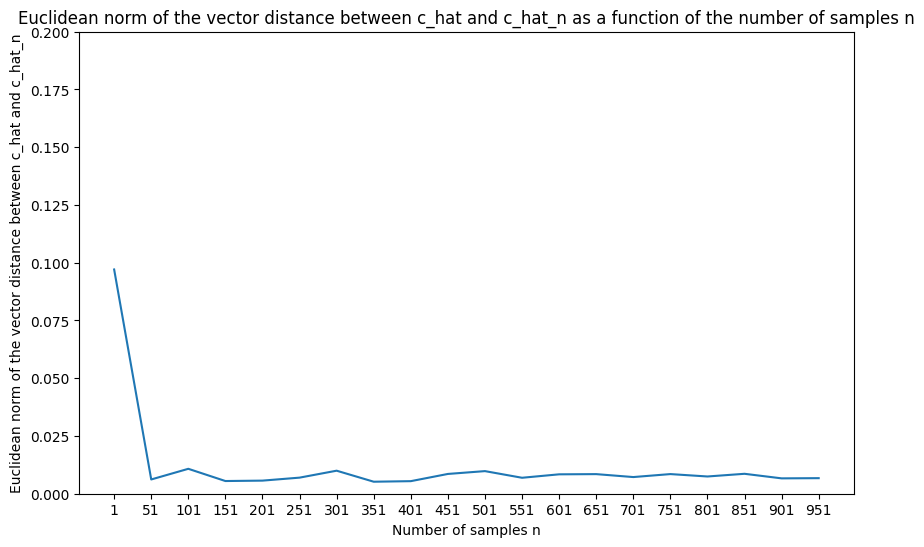

In [354]:
# plot the distance = ||c_hat - c_hat_n||_2 against the number of samples, range from N=1 to N=1,000 in steps of 50
import matplotlib.pyplot as plt

norms = []
mu = c0
covariance = 100*np.eye(n)

print(c_hat)

for i in range(50,1050, 50):
  # generate i samples
  samples = np.random.multivariate_normal(mu, covariance, i)
  # solve empirical problem
  xn0 = cp.Variable((n,))
  objective = np.sum([c_i @ xn0 for c_i in samples])
  constraints = [A @ xn0 >= b]
  # Solve the problem
  prob = cp.Problem(cp.Minimize(objective),constraints)
  prob.solve()

  # solve GIO_a(xn0)
  y = cp.Variable(m)
  epsilon_a = cp.Variable(1)
  c = cp.Variable(n)
  objective = epsilon_a
  constraints = [A.T@y == c, c @ xn0.value == b@y + epsilon_a, c>=0, cp.sum(c)==1, y>=0]
  # Solve the problem
  prob = cp.Problem(cp.Minimize(objective),constraints)
  res = prob.solve()
  c_hat_n = c.value
  norms.append(np.linalg.norm(c_hat-c_hat_n, ord=2))

print(norms)

x = range(1,1001,50)
y = norms
x_ticks = np.arange(1, 1001, 50)
plt.figure(figsize=(10, 6))
plt.xticks(x_ticks)
plt.ylim(0, 0.2)
plt.xlabel('Number of samples n')
plt.ylabel('Euclidean norm of the vector distance between c_hat and c_hat_n')
plt.title('Euclidean norm of the vector distance between c_hat and c_hat_n as a function of the number of samples n')
plt.plot(x,y)
plt.show()

<font color="green">Your answer:</font>
From the graph above, one can see that the general trend is a decrease of the error as the number of samples increases. However, starting from approximately 50 samples above, the performance does not get better but just keeps constant with some small random oscillations.

##References
[1] Timothy CY Chan, Taewoo Lee, and Daria Terekhov. Inverse optimization: Closed-form solutions, geometry, and goodness of fit. Management Science, 65(3):1115–1135, 2019.